# Mini Project 3

**워싱턴 킹 카운티의 주택 거래 가격 예측**

In [1]:
import numpy as np
import pandas as pd

input_file = "kc_house_data.csv"
df = pd.read_csv(input_file)

In [2]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
def display_scores_mean(scores):
    print("Mean:", scores.mean())

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**특성 목록**

0. ID
1. 거래 날짜
2. 거래 가격 (레이블로 사용될 예정)
3. 침실 수
4. 욕실 수
5. 내부 면적
6. 땅 면적
7. 층수
8. 해변 조망
9. 경관
10. 상태
11. 구조 설계
12. 위층 면적
13. 지하 면적
14. 건축 연도
15. 증축 연도
16. 우편 주소
17. 위도
18. 경도
19. 주위 15가구 내부 면적
20. 주위 15가구 외부 면적

**날짜를 숫자로 변환**

In [4]:
df['date']=  pd.to_datetime(df['date'])
df['date'] = df['date'].apply(lambda x: x.strftime('%Y%m%d'))
df["date"] = df["date"].astype('int64')

df["date"]

0        20141013
1        20141209
2        20150225
3        20141209
4        20150218
           ...   
21608    20140521
21609    20150223
21610    20140623
21611    20150116
21612    20141015
Name: date, Length: 21613, dtype: int64

# 특성 조합 및 추가 (위도 및 경도)

In [5]:
#lat과 log 조합

# df["lat_long_add"] = df["lat"] + df["long"]
# df["lat_long_sub"] = df["lat"] - df["long"]
# df["long_lat_sub"] = df["long"] - df["lat"]
# df["lat_long_mul"] = df["lat"] * df["long"]

df["lat_long"] = df["lat"] / df["long"] #mean값이 가장 낮게 나오는 특성 조합

# df["long_lat_div"] = df["long"] / df["lat"]

In [6]:
# df["sqft_living_grade_mult"] = df["sqft_living"] * df["grade"] # 1265

# df["sqft_living_grade_div"] = df["sqft_living"] / df["grade"] # 1275

# df["sqft_living_grade_test"] = df["sqft_living"] / (df["grade"]**2) #1271

# df["sqft_living_grade"] = df["sqft_living"] / (df["grade"]**3) #1271

df["sqft_living_grade"] = df["sqft_living"] * (df["grade"]**3) #1263

# 4제곱이랑 별로 차이 없어서 그냥 이거 씀


In [7]:
# df["condition_grade"] = df["condition"] * df["grade"] #1261

# df["condition_grade"] = df["grade"] / df["condition"] #1260 얘 쓸거임

# df["condition_grade"] = (df["condition"]**2) * (df["grade"]**2) #1261

# df["condition_grade"] = (df["grade"]**2) / (df["condition"]**2) #1260

# df["condition_grade"] = (df["grade"]**2) + (df["condition"]**2) #1261

# df["condition_grade"] = (df["grade"]**3) * (df["condition"]**3) #1261

# df["condition_grade"] = (df["grade"]**3) / (df["condition"]**3) #1260

# df["condition_grade"] = df["condition"] ** df["grade"] #1261


# 위 아래는 분리해서 따로따로 하나씩 넣어서 시행해봤음. 나누기를 넣으면 오류남

# df["waterfront_view"] = df["waterfront"] * df["view"] # 1258

df["waterfront_view"] = df["waterfront"] + df["view"] # 1252 얘만 넣는게 더 잘 나오는데??

# df["waterfront_view"] = df["waterfront"] - df["view"] # 1261

**특성 중요도 확인을 위한 상관계수 확인**

In [8]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price                1.000000
sqft_living_grade    0.769716
sqft_living          0.702035
grade                0.667434
sqft_above           0.605567
sqft_living15        0.585379
bathrooms            0.525138
waterfront_view      0.406834
view                 0.397293
sqft_basement        0.323816
bedrooms             0.308350
lat                  0.307003
waterfront           0.266369
floors               0.256794
yr_renovated         0.126434
sqft_lot             0.089661
sqft_lot15           0.082447
yr_built             0.054012
condition            0.036362
long                 0.021626
date                 0.003033
id                  -0.016762
zipcode             -0.053203
lat_long            -0.308000
Name: price, dtype: float64

# 레이블 설정 / 특성 제거

In [9]:
housing_prepared = df.drop(["price"], axis=1)
# housing_prepared = df.drop(["price", "lat_long_add", "lat_long_sub", "long_lat_sub", "lat_long_mul", "lat_long_div", "long_lat_div"], axis=1)
housing_labels = df["price"].copy()

In [10]:
housing_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21613 non-null  int64  
 1   date               21613 non-null  int64  
 2   bedrooms           21613 non-null  int64  
 3   bathrooms          21613 non-null  float64
 4   sqft_living        21613 non-null  int64  
 5   sqft_lot           21613 non-null  int64  
 6   floors             21613 non-null  float64
 7   waterfront         21613 non-null  int64  
 8   view               21613 non-null  int64  
 9   condition          21613 non-null  int64  
 10  grade              21613 non-null  int64  
 11  sqft_above         21613 non-null  int64  
 12  sqft_basement      21613 non-null  int64  
 13  yr_built           21613 non-null  int64  
 14  yr_renovated       21613 non-null  int64  
 15  zipcode            21613 non-null  int64  
 16  lat                216

**특성에 따른 변화를 보기 위해 특성 하나씩 제거해서 넣어보기**

In [11]:
housing_prepared_id = df.drop(["price", "id"], axis=1)
housing_prepared_date = df.drop(["price", "date"], axis=1)
housing_prepared_bedrooms = df.drop(["price", "bedrooms"], axis=1)
housing_prepared_bathrooms = df.drop(["price", "bathrooms"], axis=1)
housing_prepared_sqft_living = df.drop(["price", "sqft_living"], axis=1)
housing_prepared_sqft_lot = df.drop(["price", "sqft_lot"], axis=1)
housing_prepared_floors = df.drop(["price", "floors"], axis=1)
housing_prepared_waterfront = df.drop(["price", "waterfront"], axis=1)
housing_prepared_view = df.drop(["price", "view"], axis=1)
housing_prepared_condition = df.drop(["price", "condition"], axis=1)
housing_prepared_grade = df.drop(["price", "grade"], axis=1)
housing_prepared_sqft_above = df.drop(["price", "sqft_above"], axis=1)
housing_prepared_sqft_basement = df.drop(["price", "sqft_basement"], axis=1)
housing_prepared_yr_built = df.drop(["price", "yr_built"], axis=1)
housing_prepared_yr_renovated = df.drop(["price", "yr_renovated"], axis=1)
housing_prepared_zipcode = df.drop(["price", "zipcode"], axis=1)
housing_prepared_lat = df.drop(["price", "lat"], axis=1)
housing_prepared_long = df.drop(["price", "long"], axis=1)
housing_prepared_sqft_living15 = df.drop(["price", "sqft_living15"], axis=1)
housing_prepared_sqft_lot15 = df.drop(["price", "sqft_lot15"], axis=1)

# 각각의 속성을 제거하고 훈련


**기존 평균값(date가 삭제됨, house_prepare)**

Mean: 129152.92649612627

Standard deviation: 9297.502130668623

이전에 기본적인 상태에서 그리드 서치를 통해 얻은 최적 파라미터 값을 넣고 계산함

### (11.26)
max_depth = 20, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 500 기준

Mean = 127338.18569768597

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# rf_reg = RandomForestRegressor(random_state = 42, n_jobs = -1)
rf_reg = RandomForestRegressor(random_state = 42, n_jobs = -1, max_depth = 20,
                               min_samples_leaf = 3, min_samples_split = 2,
                               n_estimators = 500)

# 특성 중요도 시각화

In [13]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

rf_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(max_depth=20, min_samples_leaf=3, n_estimators=500,
                      n_jobs=-1, random_state=42)

<BarContainer object of 23 artists>

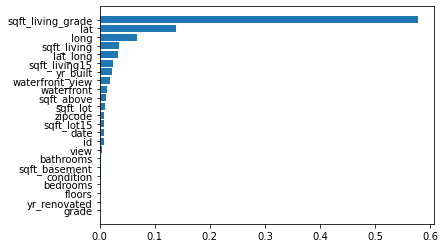

In [14]:
sorted_idx = rf_reg.feature_importances_.argsort()

plt.barh(housing_prepared.columns[sorted_idx], rf_reg.feature_importances_[sorted_idx])

# 특성별 평균값

단위를 알고 싶어서 평균을 취했음

In [15]:
print(f"mean date            : {np.mean([housing_prepared.date])}")
print(f"mean bedrooms        : {np.mean([housing_prepared.bedrooms])}")
print(f"mean bathrooms       : {np.mean([housing_prepared.bathrooms])}")
print(f"mean sqft_living     : {np.mean([housing_prepared.sqft_living])}")
print(f"mean floors          : {np.mean([housing_prepared.floors])}")
print(f"mean waterfront      : {np.mean([housing_prepared.waterfront])}")
print(f"mean view            : {np.mean([housing_prepared.view])}")
print(f"mean condition       : {np.mean([housing_prepared.condition])}")
print(f"mean grade           : {np.mean([housing_prepared.grade])}")
print(f"mean sqft_above      : {np.mean([housing_prepared.sqft_above])}")
print(f"mean sqft_basement   : {np.mean([housing_prepared.sqft_basement])}")
print(f"mean yr_renovated    : {np.mean([housing_prepared.yr_renovated])}")
print(f"mean zipcode         : {np.mean([housing_prepared.zipcode])}")
print(f"mean lat             : {np.mean([housing_prepared.lat])}")
print(f"mean long            : {np.mean([housing_prepared.long])}")
print(f"mean sqft_living15   : {np.mean([housing_prepared.sqft_living15])}")
print(f"mean sqft_lot15      : {np.mean([housing_prepared.sqft_lot15])}")
print(f"mean lat_long        : {np.mean([housing_prepared.lat_long])}")

mean date            : 20143902.668255217
mean bedrooms        : 3.37084162309721
mean bathrooms       : 2.1147573219821405
mean sqft_living     : 2079.8997362698374
mean floors          : 1.4943089807060566
mean waterfront      : 0.007541757275713691
mean view            : 0.23430342849211122
mean condition       : 3.4094295100171195
mean grade           : 7.656873178179799
mean sqft_above      : 1788.3906907879516
mean sqft_basement   : 291.5090454818859
mean yr_renovated    : 84.40225790033776
mean zipcode         : 98077.93980474715
mean lat             : 47.56005251931708
mean long            : -122.21389640494147
mean sqft_living15   : 1986.552491556008
mean sqft_lot15      : 12768.455651691113
mean lat_long        : -0.3891545518605847


# 특성 중요도 순위

특성 중요도 순위 (조합으로 생성된 특성 제외)

1. grade  @
2. sqft_living  @
3. lat  !
4. long  !
5. waterfront
6. sqft_living15
7. yr_built
8. sqft_above
9. sqft_lot
10. view

# 각 특성 제거 후 Mean값 변화가 큰 순서

바로 아래쪽부터 한동안 있는 코드들임.

특성 공학 적용 이전을 기준으로 함.

1. lat  !
2. long  !
3. waterfront  
4. grade  @
5. sqft_living  @
6. view #
7. zipcode
8. date
9. condition #
10. sqft_living15

공통으로 들어가있는 항목 (5개)

lat이랑 long은 너무 독립적이라 서로 묶고 뺴는게 나을거 같음 <br>
이래도 조합으로는 20개 정도 나옴

grade <br>
sqft_living <br>
waterfront <br>
view <br>
sqft_living15 <br>

## 가장 기본 기준이 되는 모델


특성 조합 전 : 128191

1. lat_long 추가 후 : 127019
2. sqft_living_grade 추가 후 :126341

세팅 편의성을 위해 일부러 오류 넣음

In [16]:
ㅁㄴㅇㄻㄴㅇㄹ

NameError: name 'ᄆᄂᄋᆱᄂᄋᄅ' is not defined

In [ ]:
rf_scores = cross_val_score(rf_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)
display_scores(rf_rmse_scores)

## 이 아래는 특성 제거하면서 측청한거라 무시하면 됨

rf_scores_id = cross_val_score(rf_reg, housing_prepared_id, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_id = np.sqrt(-rf_scores_id)
display_scores(rf_rmse_scores_id)

rf_scores_date = cross_val_score(rf_reg, housing_prepared_date, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_date = np.sqrt(-rf_scores_date)
display_scores(rf_rmse_scores_date)

rf_scores_bedrooms = cross_val_score(rf_reg, housing_prepared_bedrooms, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_bedrooms = np.sqrt(-rf_scores_bedrooms)
display_scores(rf_rmse_scores_bedrooms)

rf_scores_bathrooms = cross_val_score(rf_reg, housing_prepared_bathrooms, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_bathrooms = np.sqrt(-rf_scores_bathrooms)
display_scores(rf_rmse_scores_bathrooms)

rf_scores_sqft_living = cross_val_score(rf_reg, housing_prepared_sqft_living, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_sqft_living = np.sqrt(-rf_scores_sqft_living)
display_scores(rf_rmse_scores_sqft_living)

rf_scores_sqft_lot = cross_val_score(rf_reg, housing_prepared_sqft_lot, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_sqft_lot = np.sqrt(-rf_scores_sqft_lot)
display_scores(rf_rmse_scores_sqft_lot)

rf_scores_floors = cross_val_score(rf_reg, housing_prepared_floors, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_floors = np.sqrt(-rf_scores_floors)
display_scores(rf_rmse_scores_floors)

rf_scores_waterfront = cross_val_score(rf_reg, housing_prepared_waterfront, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_waterfront = np.sqrt(-rf_scores_waterfront)
display_scores(rf_rmse_scores_waterfront)

rf_scores_view = cross_val_score(rf_reg, housing_prepared_view, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_view = np.sqrt(-rf_scores_view)
display_scores(rf_rmse_scores_view)

rf_scores_condition = cross_val_score(rf_reg, housing_prepared_condition, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_condition = np.sqrt(-rf_scores_condition)
display_scores(rf_rmse_scores_condition)

rf_scores_grade = cross_val_score(rf_reg, housing_prepared_grade, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_grade = np.sqrt(-rf_scores_grade)
display_scores(rf_rmse_scores_grade)

rf_scores_sqft_above = cross_val_score(rf_reg, housing_prepared_sqft_above, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_sqft_above = np.sqrt(-rf_scores_sqft_above)
display_scores(rf_rmse_scores_sqft_above)

rf_scores_sqft_basement = cross_val_score(rf_reg, housing_prepared_sqft_basement, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_sqft_basement = np.sqrt(-rf_scores_sqft_basement)
display_scores(rf_rmse_scores_sqft_basement)

rf_scores_yr_built = cross_val_score(rf_reg, housing_prepared_yr_built, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_yr_built = np.sqrt(-rf_scores_yr_built)
display_scores(rf_rmse_scores_yr_built)

rf_scores_yr_renovated = cross_val_score(rf_reg, housing_prepared_yr_renovated, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_yr_renovated = np.sqrt(-rf_scores_yr_renovated)
display_scores(rf_rmse_scores_yr_renovated)

rf_scores_zipcode = cross_val_score(rf_reg, housing_prepared_zipcode, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_zipcode = np.sqrt(-rf_scores_zipcode)
display_scores(rf_rmse_scores_zipcode)

rf_scores_lat = cross_val_score(rf_reg, housing_prepared_lat, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_lat = np.sqrt(-rf_scores_lat)
display_scores(rf_rmse_scores_lat)

rf_scores_long = cross_val_score(rf_reg, housing_prepared_long, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_long = np.sqrt(-rf_scores_long)
display_scores(rf_rmse_scores_long)

rf_scores_sqft_living15 = cross_val_score(rf_reg, housing_prepared_sqft_living15, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_sqft_living15 = np.sqrt(-rf_scores_sqft_living15)
display_scores(rf_rmse_scores_sqft_living15)

rf_scores_sqft_lot15 = cross_val_score(rf_reg, housing_prepared_sqft_lot15, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_sqft_lot15 = np.sqrt(-rf_scores_sqft_lot15)
display_scores(rf_rmse_scores_sqft_lot15)

# 이것저것 실험

**아래에서는 쓸모없는 값 id랑 yr_built를 제거하고 해봤음**

Mean: 126079.28767913536

기존의 128000 정도에 비하면 내려간게 보임.
그래도 생각보다 값이 내려가지 않았음.

(11.26) lat_long_div 추가로 넣어서 126000까지 내렸음

In [ ]:
housing_prepared_test1 = df.drop(["id", "yr_built", "price", "bedrooms", "bathrooms", "floors", "sqft_basement"], axis=1)

#이렇게 지우면 124000까지 내려감

housing_prepared_test1.info()

In [ ]:
rf_reg = RandomForestRegressor(random_state = 42, n_jobs = -1, max_depth = 25,
                               min_samples_leaf = 2, min_samples_split = 2,
                               n_estimators = 700)

rf_scores_grid = cross_val_score(rf_reg, housing_prepared_test1, housing_labels, 
                                  scoring = "neg_mean_squared_error", cv=10) 
rf_rmse_scores_grid = np.sqrt(-rf_scores_grid)
display_scores(rf_rmse_scores_grid)

## 어쨌거나 ID랑 yr_built는 빼는 편이 나을듯

# 최적 파라미터를 찾기 위한 그리드 서치

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators' : [600, 700, 800], #결정트리 개수. 일반적으로 많으면 좋음(무조건은 아님)
    'max_depth' : [20, 25, 30], #트리 깊이
    'min_samples_leaf' : [2, 3, 4], #리프 노드가 되기 위한 최소한의 샘플 데이터 수
    'min_samples_split' : [2, 3, 4] #노드를 분할하기 위한 최소한의 데이터 수
}

In [ ]:
rf_grid = GridSearchCV(rf_reg, param_grid = rf_param_grid, n_jobs = -1, verbose = 1)
rf_grid.fit(housing_prepared_test1, housing_labels)

In [ ]:
print("최고 파라미터 :", rf_grid.best_params_)

In [ ]:
best_min_samples = rf_grid.best_params_["min_samples_leaf"]
best_samples_split = rf_grid.best_params_["min_samples_split"]
best_max_depth = rf_grid.best_params_["max_depth"]
best_n_estimators = rf_grid.best_params_["n_estimators"]

rf_reg = RandomForestRegressor(random_state = 42, n_jobs = -1, max_depth = best_max_depth,
                               min_samples_leaf = best_samples_split, min_samples_split = best_samples_split,
                               n_estimators = best_n_estimators)

In [ ]:
rf_param_grid = {
    'n_estimators' : [600, 700, 800], #결정트리 개수. 일반적으로 많으면 좋음(무조건은 아님)
    'max_depth' : [20, 25, 30], #트리 깊이
    'min_samples_leaf' : [2, 3, 4], #리프 노드가 되기 위한 최소한의 샘플 데이터 수
    'min_samples_split' : [2, 3, 4] #노드를 분할하기 위한 최소한의 데이터 수
}

rf_grid_test1 = GridSearchCV(rf_reg, param_grid = rf_param_grid, n_jobs = -1, verbose = 1)
rf_grid.fit(housing_prepared_test1, housing_labels)

In [ ]:
rf_scores_grid = cross_val_score(rf_reg, housing_prepared_test1, housing_labels, 
                                  scoring = "neg_mean_squared_error", cv=10) 
rf_rmse_scores_grid = np.sqrt(-rf_scores_grid)
display_scores(rf_rmse_scores_grid)

# 부스팅 실험

에이다 부스트 (돌리지 말 것! 뭔가 문제가 있음)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(
    RandomForestRegressor(max_depth = 25,
                               min_samples_leaf = 2, min_samples_split = 2,
                               n_estimators = 700), 
    n_estimators=200,
    learning_rate=0.5, random_state=42)

ada_clf.fit(housing_prepared_test1, housing_labels)

In [ ]:
rf_scores_adaboost = cross_val_score(ada_clf, housing_prepared_test1, housing_labels, 
                                  scoring = "neg_mean_squared_error", cv=10) 
rf_rmse_scores_grid = np.sqrt(-rf_scores_grid)
display_scores(rf_rmse_scores_grid)

# 그래디언트 부스팅

## 최적 값 찾기 위해 그래디언트 부스팅을 그리드 서치함

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0,
                                 random_state=42)
gbrt.fit(housing_prepared, housing_labels)

gbrt_scores = cross_val_score(gbrt, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
gbrt_rmse_scores = np.sqrt(-gbrt_scores)

In [20]:
from sklearn.model_selection import GridSearchCV

gbrt_param_grid = {
    'n_estimators' : [200, 400, 600, 800, 1000], #결정트리 개수. 일반적으로 많으면 좋음(무조건은 아님)
    'max_depth' : [20, 25, 30], #트리 깊이
    'min_samples_leaf' : [2, 3, 4], #리프 노드가 되기 위한 최소한의 샘플 데이터 수
    'min_samples_split' : [2, 3, 4], #노드를 분할하기 위한 최소한의 데이터 수
    'learning_rate' : [0.2, 0.4, 0.6, 0.8]
}

In [ ]:
gbrt_grid = GridSearchCV(gbrt, param_grid = gbrt_param_grid, n_jobs = -1, verbose = 1)
gbrt_grid.fit(housing_prepared, housing_labels)
# gbrt_grid.fit(housing_prepared_test1, housing_labels)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


In [ ]:
bst_min_samples_leaf = gbrt_grid.best_params_["min_samples_leaf"]
bst_samples_split = gbrt_grid.best_params_["min_samples_split"]
bst_max_depth = gbrt_grid.best_params_["max_depth"]
bst_n_estimators = gbrt_grid.best_params_["n_estimators"]
bst_learning_rate = gbrt_grid.best_params_["learning_rate"]

gbrt.grid.best_params_

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=bst_max_depth, n_estimators=bst_n_estimators,
                                 min_samples_leaf=bst_min_samples_leaf, min_samples_split=bst_samples_split
                                 learning_rate=bst_learning_rate
                                 random_state=42)
gbrt.fit(housing_prepared, housing_labels)

gbrt_scores = cross_val_score(gbrt, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
gbrt_rmse_scores = np.sqrt(-gbrt_scores)

### 효율을 위해 특성 공학 적용 후의 X_train으로 시험도 해봄

In [ ]:
# gbrt_grid = GridSearchCV(gbrt, param_grid = gbrt_param_grid, n_jobs = -1, verbose = 1)
# gbrt_grid.fit(housing_prepared, housing_labels)
gbrt_grid.fit(housing_prepared_test1, housing_labels)

In [ ]:
bst_min_samples_leaf = rf_grid.best_params_["min_samples_leaf"]
bst_samples_split = rf_grid.best_params_["min_samples_split"]
bst_max_depth = rf_grid.best_params_["max_depth"]
bst_n_estimators = rf_grid.best_params_["n_estimators"]
bst_learning_rate = rf_grid.best_params_["learning_rate"]

rf.grid.best_params_

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=bst_max_depth, n_estimators=bst_n_estimators,
                                 min_samples_leaf=bst_min_samples_leaf, min_samples_split=bst_samples_split
                                 learning_rate=bst_learning_rate
                                 random_state=42)
gbrt.fit(housing_prepared_test1, housing_labels)

gbrt_scores = cross_val_score(gbrt, housing_prepared_test1, housing_labels, scoring = "neg_mean_squared_error", cv=10)
gbrt_rmse_scores = np.sqrt(-gbrt_scores)

### 아래는 일반적 그래디언트 부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 25,
                               min_samples_leaf = 2, min_samples_split = 2,
                               n_estimators = 700,
                                learning_rate=0.5)
gbrt.fit(housing_prepared_test1, housing_labels)

gbrt_best = GradientBoostingRegressor(max_depth=25, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(housing_prepared, housing_labels)

In [ ]:
rf_scores_gbrt = cross_val_score(gbrt, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_gbrt = np.sqrt(-rf_scores_gbrt)
display_scores(rf_rmse_scores_gbrt)

In [ ]:
rf_scores_gbrt = cross_val_score(gbrt, housing_prepared_test1, housing_labels, scoring = "neg_mean_squared_error", cv=10)
rf_rmse_scores_gbrt = np.sqrt(-rf_scores_gbrt)
display_scores(rf_rmse_scores_gbrt)

# 11월 26일 기록


그 전에, 특성끼리 조합하는건 기본적으로 사칙연산을 베이스로 진행하였음.

대략 세 가지의 결론이 있었는데

1. sub나 div는 앞 뒤를 바꾸어도 유의미한 mean값의 변화가 나타나지 않음
2. 하나의 조합된 특성만을 사용하는 편이 나음
3. 특성간의 단위가 다른 경우도 있으므로 비슷하면 add나 sub, 차이가 많이 나면 mul이나 div가 나음


**그래서 다음으로 할 일들은??**

1. 갱신된 기존 mean값 정리해서 기록
2. 특성별로 평균(혹은 최대치 or 최소치, 최대-최소치 등...)을 시각화해서 단위 확인
3. 그리드서치의 최적 파라미터를 기반으로 최적 파라미터값 찾아가기
4. 부스팅 건드려보기(11/27)

# 11월 27일 기록

주피터 죽어서 개고생함. 적당히 놓고 돌리면서 냉각 시켜야할듯

애매한 특성은 빼는게 값이 더 잘 나옴.
싹 다 빼고 한번 돌려보기도 해야할듯